In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def gAvg(x, gdFunc, nSamples, targetFunc):
    gdFuncs = []
    for _ in range(nSamples):
        x1, x2 = -1 + np.random.random_sample((2,)) * 2
        gdFuncs.append(gdFunc(x, x1, x2))
    averageGfuncX = np.mean(gdFuncs) 
    return averageGfuncX, np.var(gdFuncs), (averageGfuncX - targetFunc(x))**2


In [87]:
def getPrams(gdFunc, targetFunc, nDataSamples, nXSamples):
    variances, biases, eOuts = [], [], []
    for _ in range(nXSamples):
        x = -1 + np.random.random_sample((1,)) * 2
        _, variance, bias = gAvg(x, gdFunc, nDataSamples, targetFunc)
        variances.append(variance)
        biases.append(bias)
        eOutData = []
        for _ in range(nDataSamples):
            x1, x2 =  -1 + np.random.random_sample((2,)) * 2
            eOutData.append((gdFunc(x, x1, x2) - targetFunc(x))**2)
        eOuts.append(np.mean(eOutData))
    variance = np.mean(variances)    
    bias = np.mean(biases)
    eOut = np.mean(eOuts)
    return variance, bias, eOut

In [88]:
 
def gdFunc(x, x1, x2):
    a = x1 + x2
    b = -x1 * x2
    return a * x + b

In [89]:
def plot(gdFunc, targetFunc, nDataSamples):
    xs = np.arange(-1, 1, 0.01)
    trueFunction, avgGFunction= [], []
    for x in xs:
        trueFunction.append(targetFunc(x))
        meanG, _, _ = gAvg(x, gdFunc, nDataSamples, targetFunc)
        avgGFunction.append(meanG)

        
    plt.plot(xs, trueFunction, color='red', label='True Function')
    plt.plot(xs, avgGFunction, color='green', label='Average Hypothesis gBar')
    plt.legend(['True Function', 'Average Hypothesis gBar'], loc='center right', bbox_to_anchor=(1.5, 0.5))
    return avgGFunction

variance :  0.32597572932893887
bias:  0.1877516137290458
bias+variance:  0.5137273430579847
expected out-of-sample error:  0.5129570409014717


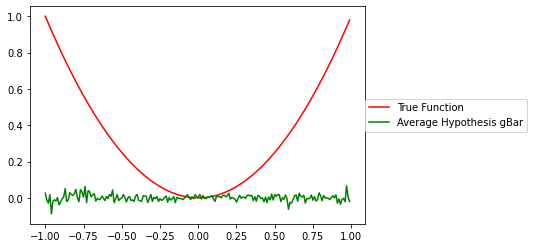

In [90]:
nDataSamples = 1000
nXSamples = 1000
def targetFunc(x):
    return x**2
variance, bias, eOut = getPrams(gdFunc, targetFunc, nDataSamples, nXSamples)
print('variance : ', variance)
print('bias: ', bias)
print('bias+variance: ', bias + variance)
print('expected out-of-sample error: ', eOut)
a = plot(gdFunc, lambda x: x**2, nDataSamples)